In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_name = '07_spacex_launch_dash.csv'
spacex_df = pd.read_csv(file_name)

# Displaying the first few rows of the dataset
spacex_df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


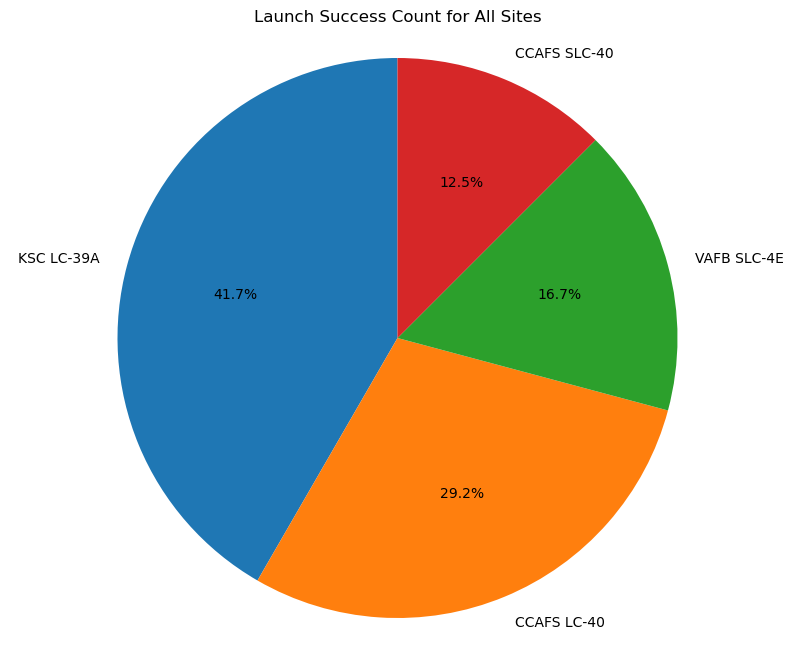

In [2]:
# Filter out successful launches
success_df = spacex_df[spacex_df['class'] == 1]

# Count the number of successful launches for each site
success_counts = success_df['Launch Site'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Launch Success Count for All Sites')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

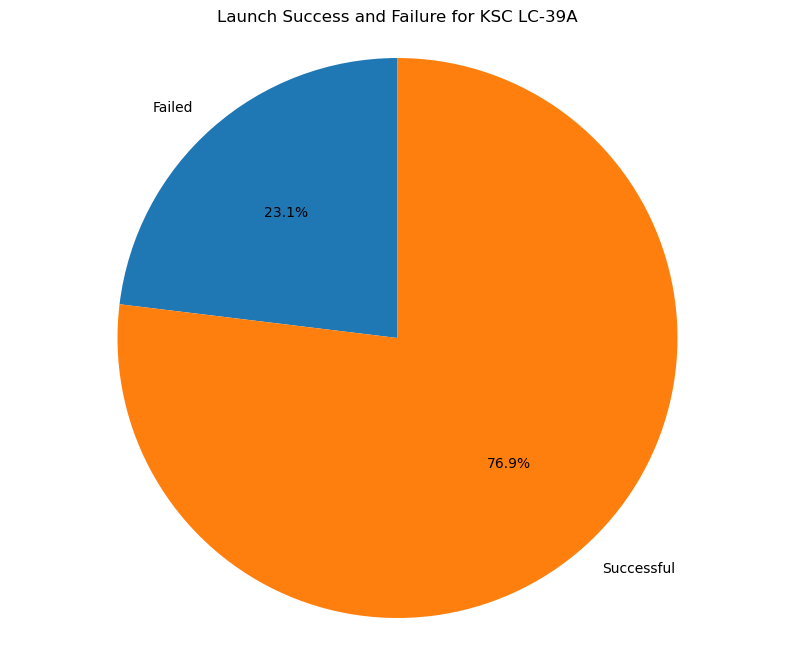

In [3]:
# Count the total number of launches for each site
total_counts = spacex_df['Launch Site'].value_counts()

# Calculate the success ratio for each site
success_ratio = (success_counts / total_counts).sort_values(ascending=False)

# Get the site with the highest success ratio
highest_ratio_site = success_ratio.idxmax()

# Filter data for the site with the highest success ratio
highest_ratio_df = spacex_df[spacex_df['Launch Site'] == highest_ratio_site]

# Count the number of successful and unsuccessful launches for this site
highest_ratio_counts = highest_ratio_df['class'].value_counts().sort_index()

# Labels for the pie chart
labels = ['Failed', 'Successful']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(highest_ratio_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Launch Success and Failure for {highest_ratio_site}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


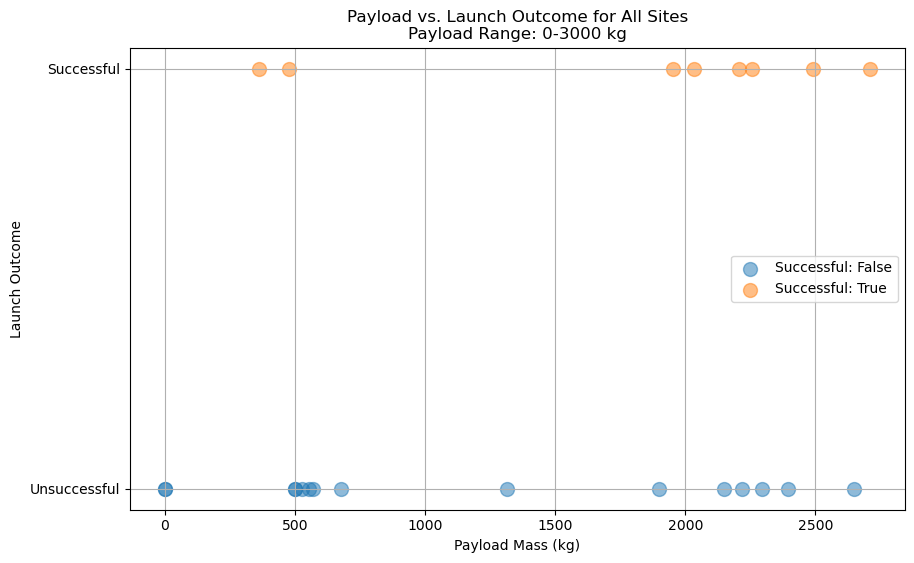

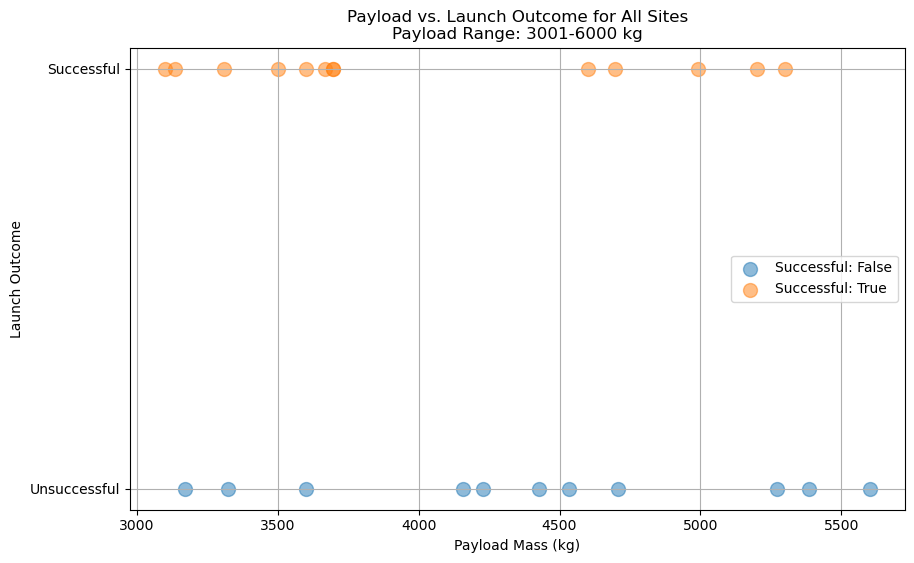

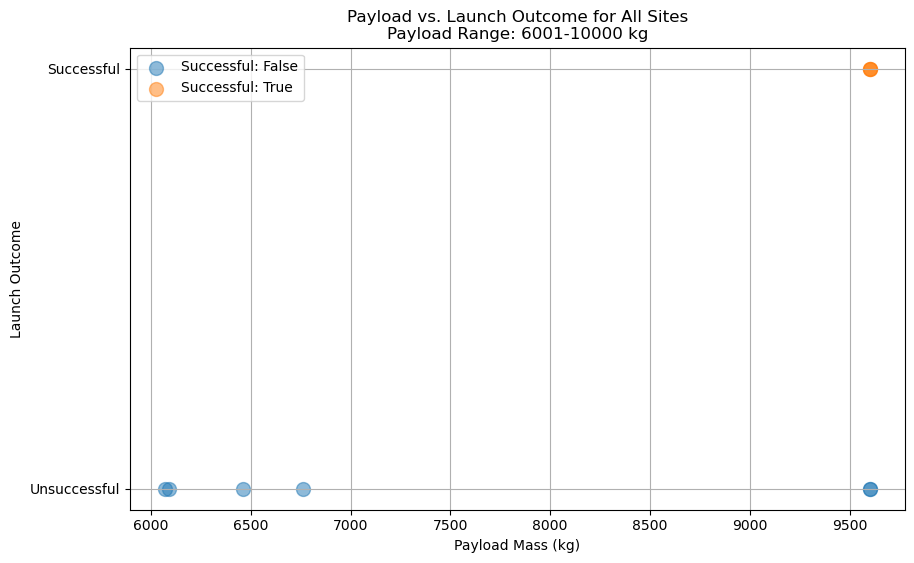

In [8]:
# Define a function to plot scatter plot for different payload ranges
def plot_scatter_for_payload_range(min_payload, max_payload):
    # Filter the data for the selected payload range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= min_payload) & 
                             (spacex_df['Payload Mass (kg)'] <= max_payload)]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for label, df in filtered_df.groupby('class'):
        plt.scatter(df['Payload Mass (kg)'], df['class'], label=f'Successful: {label==1}', alpha=0.5, s=100)
    
    plt.title(f'Payload vs. Launch Outcome for All Sites\nPayload Range: {min_payload}-{max_payload} kg')
    plt.xlabel('Payload Mass (kg)')
    plt.ylabel('Launch Outcome')
    plt.yticks([0, 1], ['Unsuccessful', 'Successful'])
    plt.legend()
    plt.grid(True)

# Plot scatter plots for different payload ranges
plot_scatter_for_payload_range(0, 3000)
plt.show()

plot_scatter_for_payload_range(3001, 6000)
plt.show()

plot_scatter_for_payload_range(6001, 10000)
plt.show()
